# Volume 3: Pandas 5 (GeoPandas) 
    <Name>
    <Class>
    <Date>

In [1]:
import geopandas
from matplotlib import pyplot as plt
import geoplot.crs as gcrs
import geoplot
import numpy as np
import pandas as pd
from shapely.geometry import Point

## Problem 1

Read in the file *airports.csv* as a pandas dataframe. Convert the dataframe into a geopandas dataframe.

Find the distance between the following airports:
1. Halifax / CFB Shearwater Heliport (Halifax, Canada) to Murtala Muhammed International Airport (Lagos, Nigeria)
2. Don Mueang International Airport (Bangkok, Thailand) and Beijing Capital International Airport (Beijing, China)
3. Salt Lake City International Airport (Salt Lake City, USA) and Auckland International Airport (Auckland, New Zealand)

In [2]:
# Read in the dataframe
airports = pd.read_csv("airports.csv",index_col="Name") # index by name

# Make Coordinates column
airports["Coordinates"] = list(zip(airports.Longitude, airports.Latitude))

# Set coordinates as point objects
airports["Coordinates"] = airports["Coordinates"].apply(Point)

# convert to geopandas data frame
gdf_airports = geopandas.GeoDataFrame(airports, geometry="Coordinates")

dist1 = gdf_airports.loc["Halifax / CFB Shearwater Heliport"]["Coordinates"].distance(
        gdf_airports.loc["Murtala Muhammed International Airport"]["Coordinates"])

dist2 = gdf_airports.loc["Don Mueang International Airport"]["Coordinates"].distance(
        gdf_airports.loc["Beijing Capital International Airport"]["Coordinates"])

dist3 = gdf_airports.loc["Salt Lake City International Airport"]["Coordinates"].distance(
        gdf_airports.loc["Auckland International Airport"]["Coordinates"])

print("Distance from Halifax, Canada to Lagos, Nigeria:\n\t {}".format(dist1))
print("Distance from Bangkok, Thailand to Beijing, China:\n\t {}".format(dist2))
print("Distance from Salt Lake City, USA to Auckland, New Zealand:\n\t {}".format(dist3))

Distance from Halifax, Canada to Lagos, Nigeria:
	 76.90077039796525
Distance from Bangkok, Thailand to Beijing, China:
	 30.65998230105051
Distance from Salt Lake City, USA to Auckland, New Zealand:
	 297.1352055031653


## Problem 2
Read in the built-in GeoDataFrame *naturalearth_lowres*.
Create a GeoDataFrame that only contains information about the southern hemisphere.
Use this data to find the country with the smallest and largest area in the southern hemisphere.
Dissolve this GeoDataFrame to find the continent with the largest and smallest area in the southern hemisphere.

In [3]:
# Read in the built-in naturalearth_lowres
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Get only the southern hemisphere
south = world.cx[:,:0]

# Find the largest and smallest countries in the southern hemisphere
smallest_country = south["name"][ south["geometry"].area.idxmin() ]
largest_country = south["name"][ south["geometry"].area.idxmax() ]
print("Smallest country:", smallest_country)
print("Largest country:", largest_country)

# Dissolve this to find the continent with largest and smallest area
south_continents = south.dissolve(by="continent", aggfunc='sum')

smallest_continent = south_continents["geometry"].area.idxmin()
largest_continent = south_continents["geometry"].area.idxmax()
print("Smallest continent:", smallest_continent)
print("Largest continent:", largest_continent)

Smallest country: Vanuatu
Largest country: Antarctica
Smallest continent: Seven seas (open ocean)
Largest continent: Antarctica


## Problem 3

Using the built-in GeoDataFrame *naturalearth_lowres* and GeoPlots, create population density plots for Asia and South America.
Use Mercator maps.

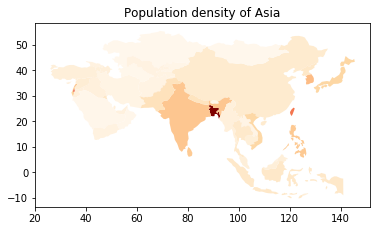

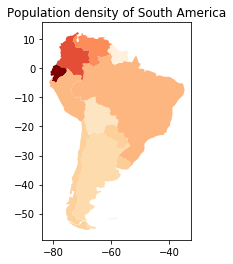

In [4]:
# Calculate population density for each country
world["pop_density"] = world["pop_est"] / world["geometry"].area

# Change CRS of world to Mercator
world.crs = {'init':'epsg:3395'}

# Plot population density for Asia and South America
world[world.continent=="Asia"].plot(column="pop_density", cmap="OrRd")
plt.title("Population density of Asia")
plt.show()

# Plot population density for South America
world[world.continent=="South America"].plot(column="pop_density", cmap="OrRd")
plt.title("Population density of South America")
plt.show()

## Problem 4

Merge the airports GeoDataFrame and the *naturalearth_lowres* GeodataFrame on their spatial data. Use this new GeoDataFrame to find the airport in the country with the smallest population estimate.

In [5]:
# Mercator for airports
gdf_airports.crs = {'init':'epsg:3395'}

# Merge airports and world on spacial data (geometry)
combined_data = geopandas.sjoin(world, gdf_airports,how='inner',op='intersects')

# Get the index of the airport in the country with the smallest population estimate
smallest_country_idx = combined_data["pop_est"].idxmin()

print("Airport in the smallest country by population:\n\t ",combined_data['index_right'][smallest_country_idx])
print("\n\n(The country is {})".format(combined_data['name'][smallest_country_idx]))

Airport in the smallest country by population:
	  Mount Pleasant Airport


(The country is Falkland Is.)
